In [1]:
# Import libraries
import pandas as pd
import numpy as np 
import sklearn 
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import excel file
df = pd.read_excel('Merged/Merged.xlsx')

# Descriptive Analytics 
### ACT scores trending upward throughout the years

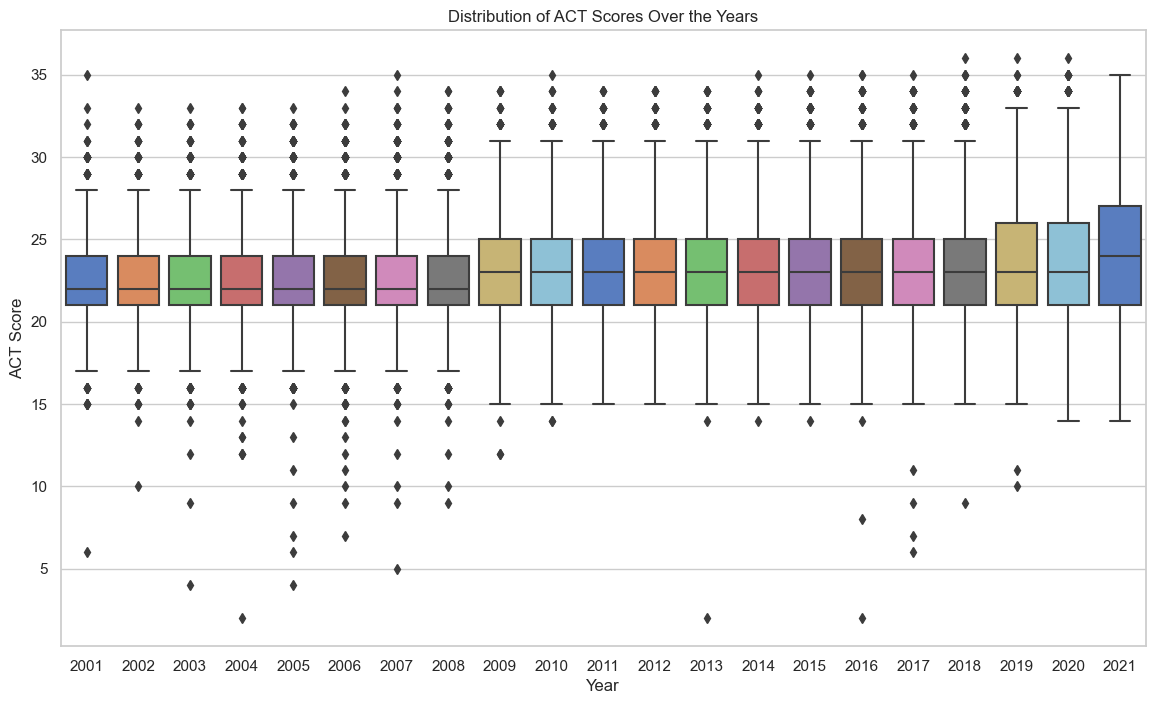

In [3]:
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create a boxplot
sns.boxplot(x=df['Year'], y=df['ACTCMMID'], palette='muted')


plt.title('Distribution of ACT Scores Over the Years')
plt.xlabel('Year')
plt.ylabel('ACT Score')
plt.show()
# ACT scores 

Let's access  ACT score distribution amongst the different regions
- 0	U.S. Service Schools
- 1	New England (CT, ME, MA, NH, RI, VT)
- 2	Mid East (DE, DC, MD, NJ, NY, PA)
- 3	Great Lakes (IL, IN, MI, OH, WI)
- 4	Plains (IA, KS, MN, MO, NE, ND, SD)
- 5	Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)
- 6	Southwest (AZ, NM, OK, TX)
- 7	Rocky Mountains (CO, ID, MT, UT, WY)
- 8	Far West (AK, CA, HI, NV, OR, WA)
- 9	Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)

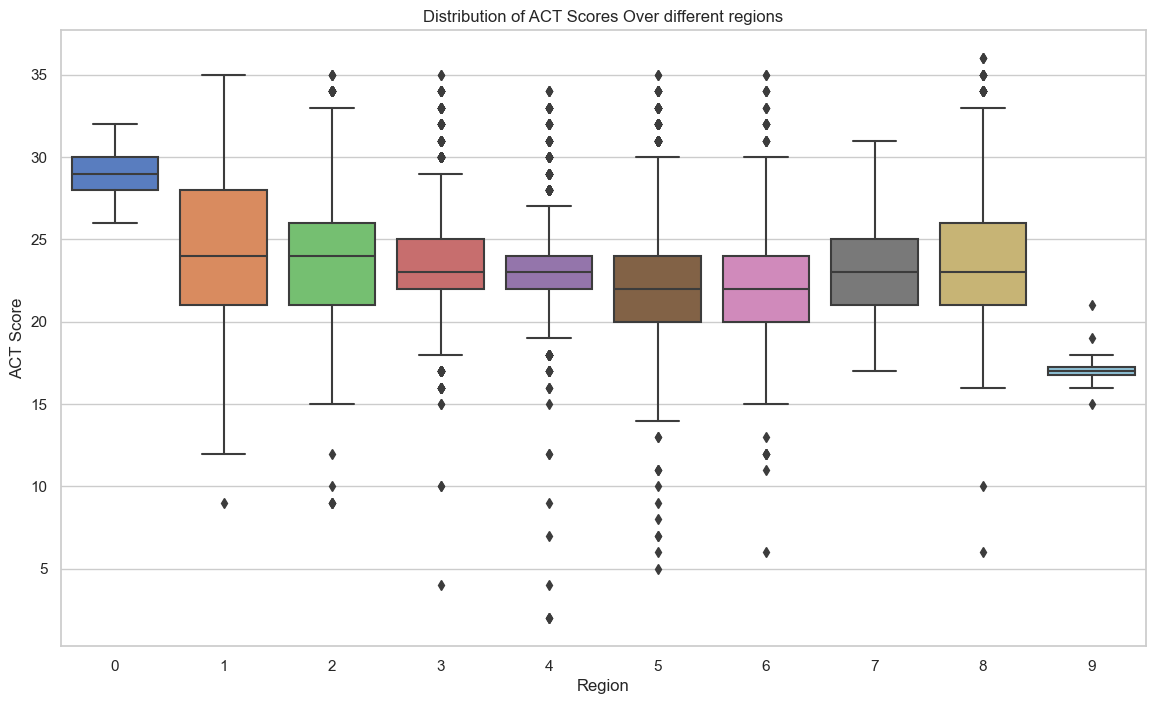

In [4]:
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create a boxplot
sns.boxplot(x=df['REGION'], y=df['ACTCMMID'], palette='muted')
plt.title('Distribution of ACT Scores Over different regions')
plt.xlabel('Region')
plt.ylabel('ACT Score')
plt.show()

/Users/rogercastillo/opt/anaconda3/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/rogercastillo/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/Users/rogercastillo/opt/anaconda3/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/rogercastillo/opt/anaconda3/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/rogercastillo/opt/anaconda3/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/rogercastillo/opt/anaconda3/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(

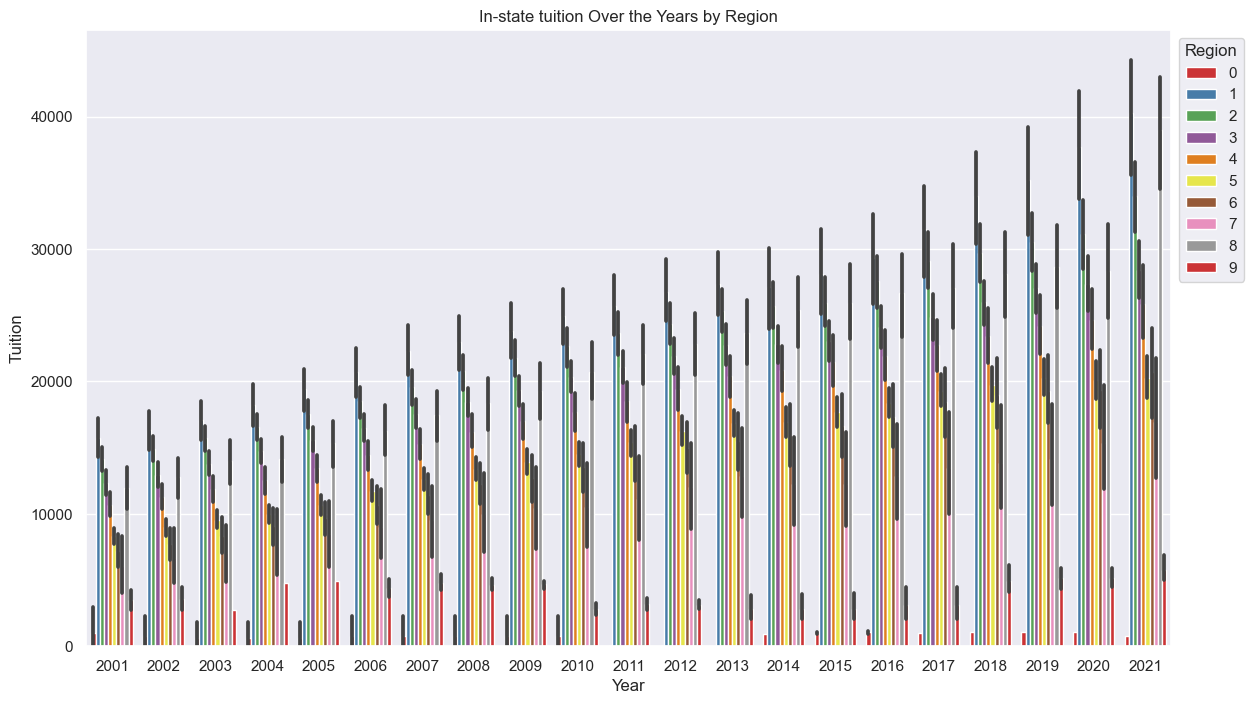

/Users/rogercastillo/opt/anaconda3/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/rogercastillo/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/Users/rogercastillo/opt/anaconda3/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/rogercastillo/opt/anaconda3/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/rogercastillo/opt/anaconda3/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/rogercastillo/opt/anaconda3/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(

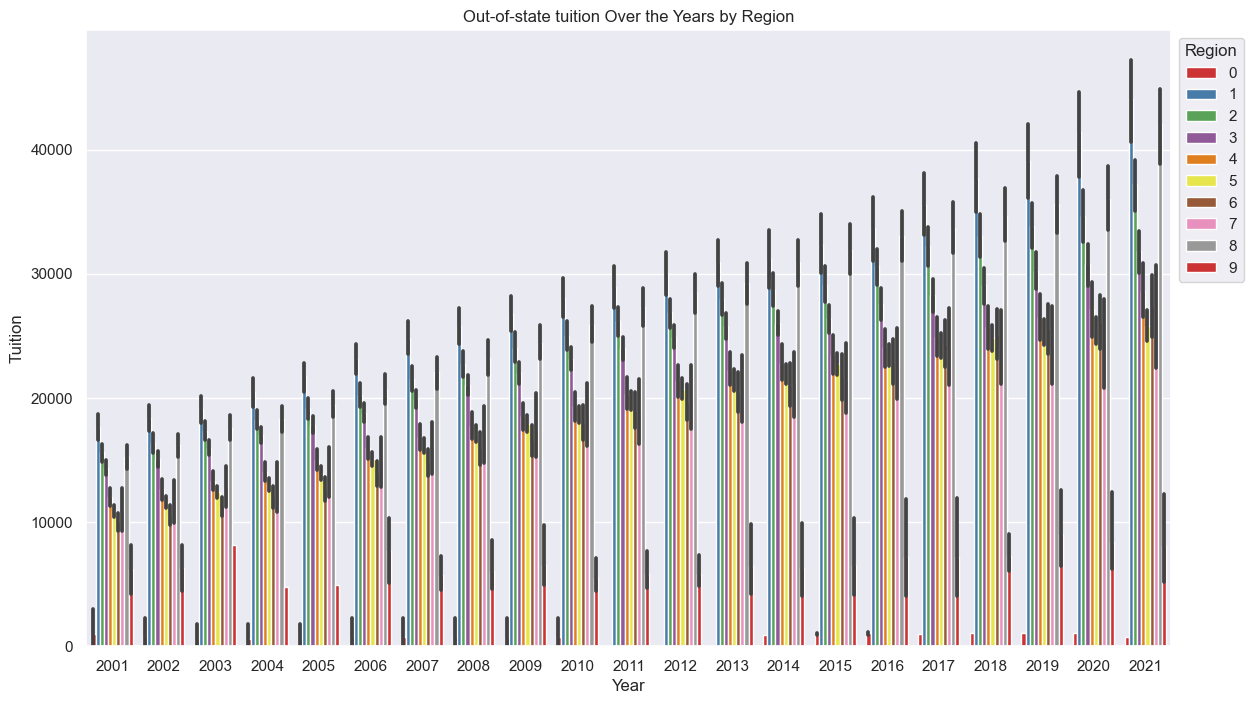

In [5]:
plt.figure(figsize=(14, 8))
sns.set(style="darkgrid")
sns.barplot(x='Year', y='TUITIONFEE_IN', hue='REGION', data=df, palette='Set1')
plt.title('In-state tuition Over the Years by Region')
plt.xlabel('Year')
plt.ylabel('Tuition')
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

plt.figure(figsize=(14, 8))
sns.set(style="darkgrid")
sns.barplot(x='Year', y='TUITIONFEE_OUT', hue='REGION', data=df, palette='Set1')
plt.title('Out-of-state tuition Over the Years by Region')
plt.xlabel('Year')
plt.ylabel('Tuition')
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

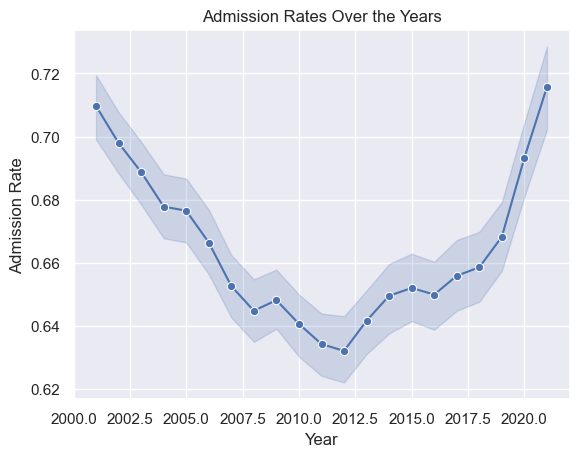

In [6]:
sns.lineplot(x='Year', y='ADM_RATE', data=df, marker='o', color='b')
plt.title('Admission Rates Over the Years')
plt.xlabel('Year')
plt.ylabel('Admission Rate')

# Show the plot
plt.show()

# More Analytics

### Creating columns that may be valuable later

In [68]:
mapping = {0: 'Service/Military', 1: 'New England', 2: 'Mid East', 3: 'Great Lakes', 4: 'Plains', 5: 'Southeast', 6:'Southwest', 7:'Rocky Mountains', 8: 'West', 9: 'Outside Areas'}
df['REGIONNAME'] = df['REGION'].map(mapping)

# Statistical Analysis 

# Inference of means
### Cluster Analysis
- When peforming statistical analysis can make a big impact, so we will be removing nan values with the columns we are working with

In [3]:
# Importing packages
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df_copy = df.copy()
df_2020 = df_copy[df_copy['Year']==2020]

In [5]:
# Factors
factors = ['ACTCMMID', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'ENDOWEND', 'ADM_RATE', 'INSTNM']
selected_df = df_2020[factors].dropna()
# Scaling the columns
scaler = StandardScaler()
scaled_cols = scaler.fit_transform(selected_df[['ACTCMMID', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'ENDOWEND', 'ADM_RATE']])

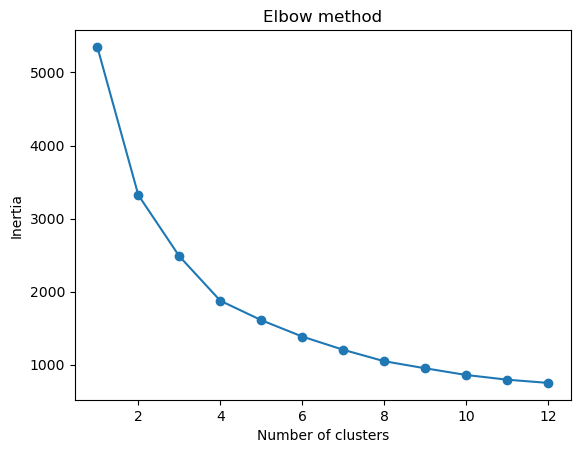

In [6]:
wss = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters=i, random_state=13)
    kmeans.fit(scaled_cols)
    wss.append(kmeans.inertia_)

#### Plotting clusters
plt.plot(range(1,13), wss, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

- According to the elbow method using 2 clusters is a good value for K

### Visualizing clusters

In [7]:
clusters = 2
kmeans = KMeans(n_clusters=clusters, random_state=13)
selected_df['cluster'] = kmeans.fit_predict(scaled_cols)

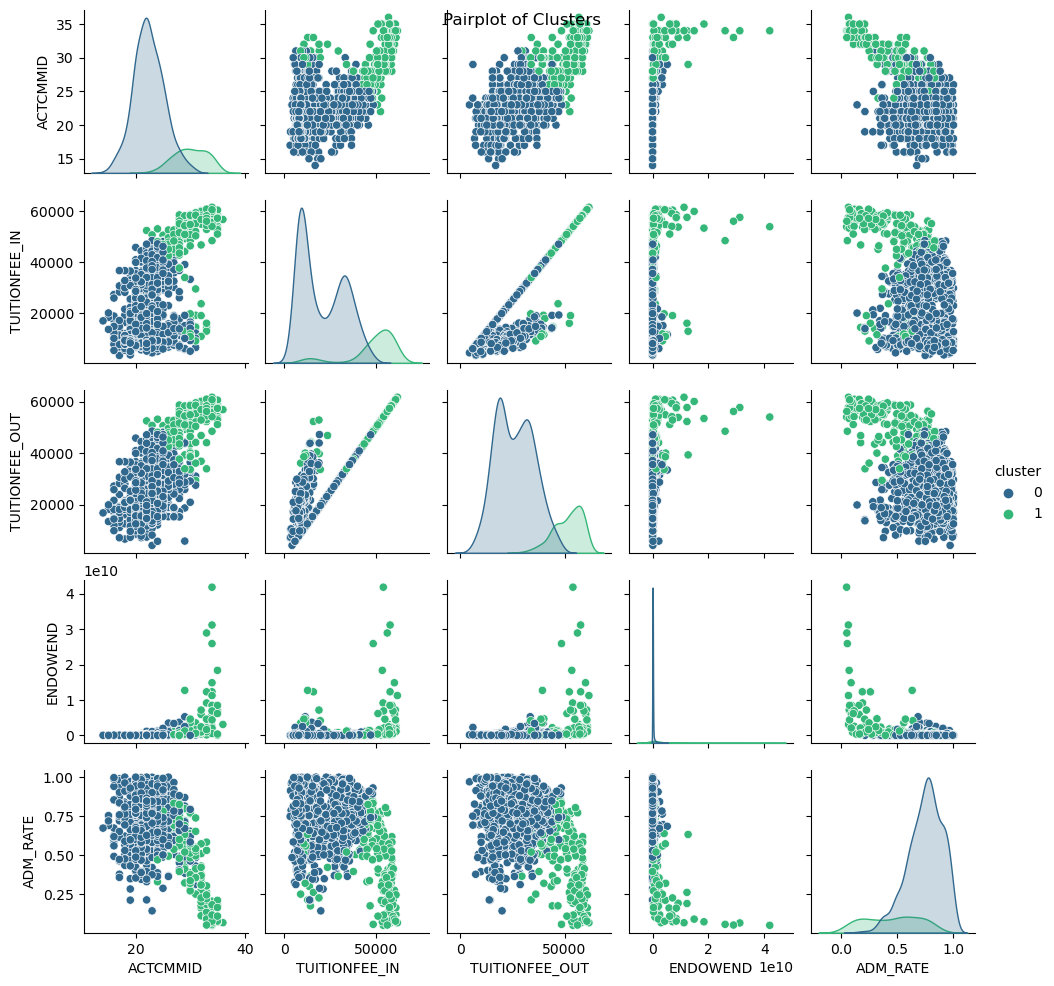

In [8]:
sns.pairplot(selected_df, hue='cluster', palette='viridis', diag_kind='kde', height=2)
plt.suptitle('Pairplot of Clusters')
plt.show()

In [9]:
# Cluster Means
selected_df.groupby('cluster').mean()

,ACTCMMID,TUITIONFEE_IN,TUITIONFEE_OUT,ENDOWEND,ADM_RATE
cluster,,,,,
0,22.387133,20830.532731,26040.723476,1.472320e+08,0.745317
1,30.010870,48879.065217,51511.641304,2.353980e+09,0.452716


Cluster 0:
- Mean ACT Composite Midpoint: 22.39
- Mean In-State Tuition Fee: $20,830.53
- Mean Out-of-State Tuition Fee: $26,040.72
- Mean Endowment: $147,232,000 (1.47 billion)
- Mean Admission Rate: 74.53%

Cluster 1:
- Mean ACT Composite Midpoint: 30.01
- Mean In-State Tuition Fee: $48,879.07
- Mean Out-of-State Tuition Fee: $51,511.64
- Mean Endowment: $2,353,980,000 (2.35 billion)
- Mean Admission Rate: 45.27%

<AxesSubplot: xlabel='ACTCMMID', ylabel='ADM_RATE'>

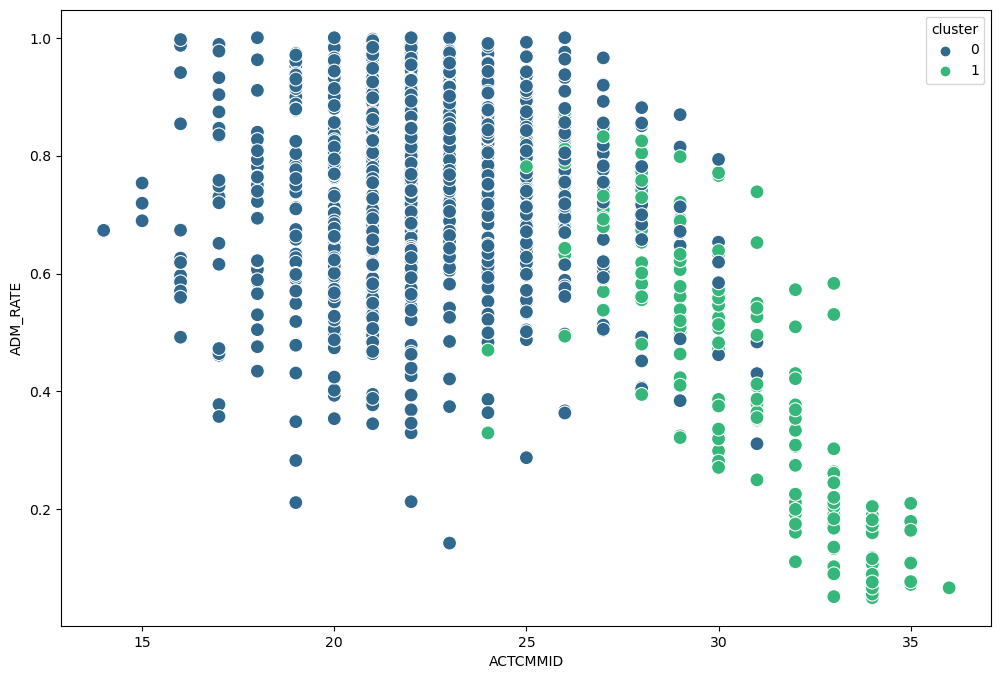

In [10]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='ACTCMMID', y='ADM_RATE', hue='cluster', palette='viridis', data=selected_df, s=100)
#for i, row in selected_df.iterrows():
#    plt.annotate(row['INSTNM'], (row['ACTCMMID'], row['ADM_RATE']), textcoords="offset points", xytext=(0, 5), ha='center')

With the subsetted dataframe containing over 1000 schools, printing the school names is not feasible. A solution to this is set randomly 50 hundred schools

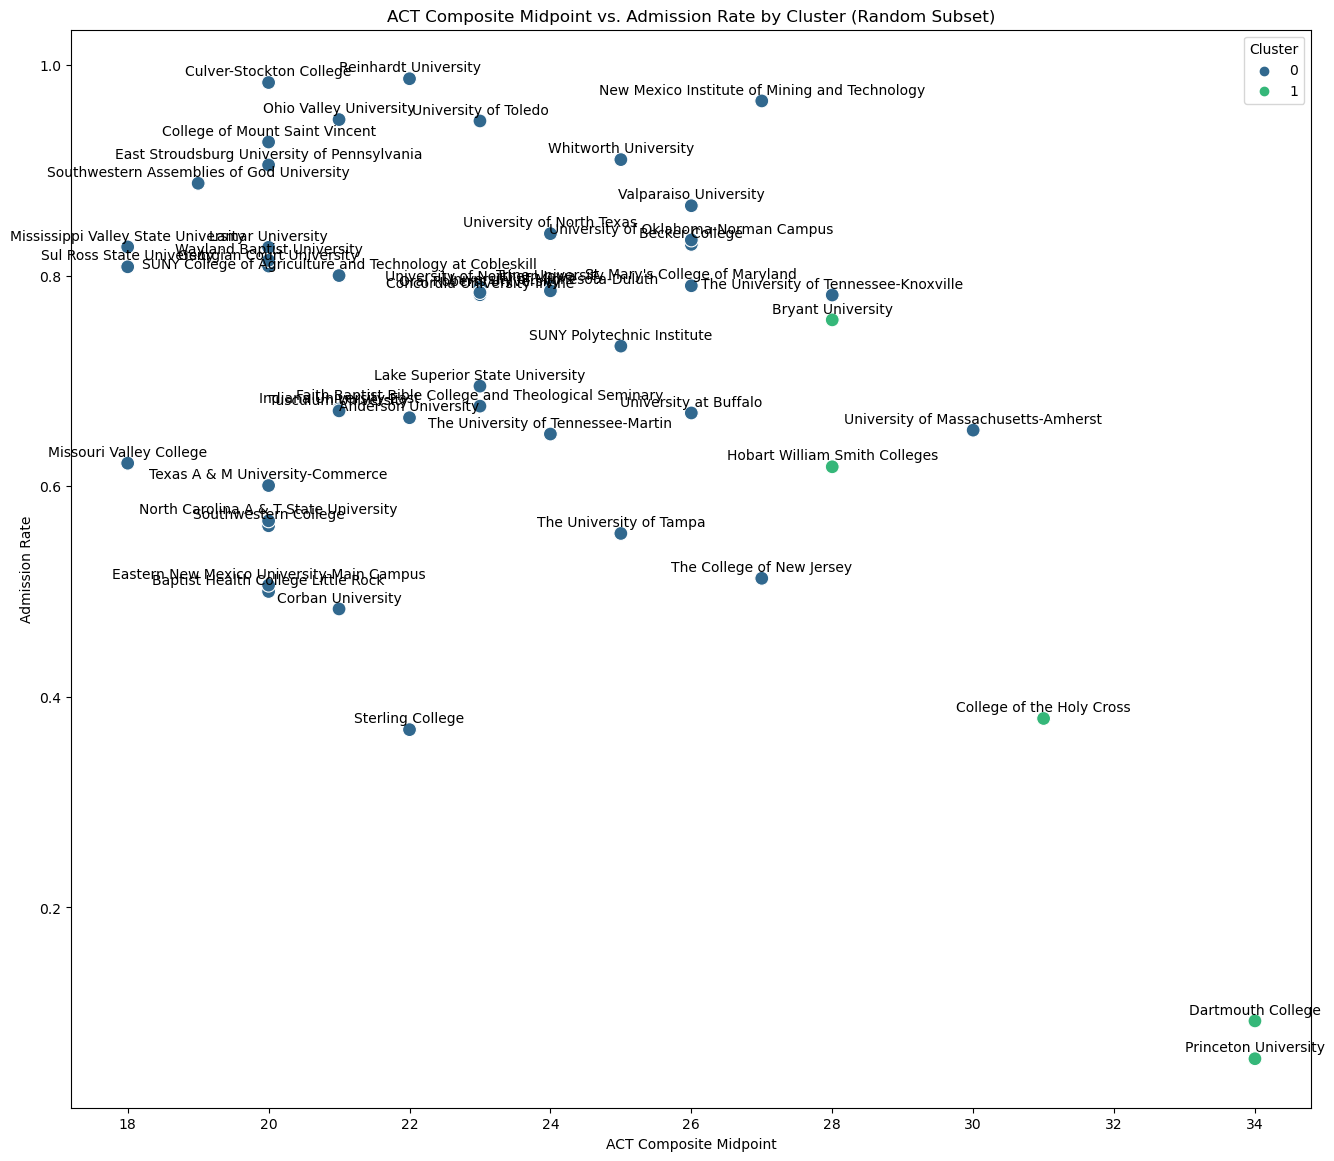

In [45]:
import random
random.seed(13)  
selected_schools = random.sample(selected_df['INSTNM'].tolist(), 50)
selected_df_subset = selected_df[selected_df['INSTNM'].isin(selected_schools)]

plt.figure(figsize=(16, 14))
sns.scatterplot(x='ACTCMMID', y='ADM_RATE', hue='cluster', palette='viridis', data=selected_df_subset, s=100)

for i, row in selected_df_subset.iterrows():
    plt.annotate(row['INSTNM'], (row['ACTCMMID'], row['ADM_RATE']), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('ACT Composite Midpoint vs. Admission Rate by Cluster (Random Subset)')
plt.xlabel('ACT Composite Midpoint')
plt.ylabel('Admission Rate')
plt.legend(title='Cluster')
plt.show()


In [58]:
print(selected_df[['INSTNM', 'TUITIONFEE_IN']].sort_values(by='TUITIONFEE_IN', ascending=False).head(10))
print(selected_df[['INSTNM', 'TUITIONFEE_OUT']].sort_values(by='TUITIONFEE_OUT', ascending=False).head(10))
print(selected_df[['INSTNM', 'ACTCMMID']].sort_values(by='ACTCMMID', ascending=False).head(10))
print(selected_df[['INSTNM', 'ADM_RATE']].sort_values(by='ADM_RATE', ascending=True).head(10))

                                           INSTNM  TUITIONFEE_IN
7423  Columbia University in the City of New York        61671.0
7495                               Vassar College        60930.0
7229                              Amherst College        60890.0
7263                             Tufts University        60862.0
7696                             Brown University        60696.0
7059                        University of Chicago        60552.0
6946            University of Southern California        60275.0
7235                               Boston College        60202.0
7390                            Dartmouth College        60117.0
7672                   University of Pennsylvania        60042.0
                                           INSTNM  TUITIONFEE_OUT
7423  Columbia University in the City of New York         61671.0
7495                               Vassar College         60930.0
7229                              Amherst College         60890.0
7263                 

As expected Ivy League schools and UC schools dominate in having the highest tutiion rates, while also being the most ocmpetitive by having a much lower admission rate and students with higher academic scores

### Regression Analysis
- According to Federal Student Aid website, graduation rates can be defined as " school's percentage of first-time, first-year undergraduate students who complete their program within 150% of the published time for the program"
- We have an exact variable meeting that defintion (C150_4)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df2 = df.copy()
df2_cleaned = df2.dropna(subset=['ADM_RATE',  'C150_4', 'DEBT_MDN'])
# Define predictor variable (X) and response variable (y)
X = df2_cleaned[['ADM_RATE', 'DEBT_MDN']]
y = df2_cleaned['C150_4']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the regression line
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Admission Score')
plt.ylabel('Graduation Rate')
plt.title('Linear Regression Model')
plt.show()


ValueError: could not convert string to float: 'PrivacySuppressed'

### Recommendation System